## Programming Exercise 3: Multi-class Classification and Neural Networks

In [116]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

### 1 Multi-class Classification

#### 1.1 Dataset 
우리가 여기서 사용할 데이터셋을 불러와보자. neural network를 이용해서 multi-class 이미지의 classification을 해볼 것이다. 

In [20]:
# 데이터를 불러오자. 
datafile = 'data/ex3data1.mat'
# scipy에 loadmat이라는 mat파일을 불러오는 함수를 사용한다. 
mat = scipy.io.loadmat(datafile)
# X, y를 지정해준다. 
X, y = mat['X'], mat['y']
## X와 y가 어떤 값들로 이루어져 있는지 확인해보자. 
print("X shape: %s. X[0] shape: %s"%(X.shape,X[0].shape))
print("y shape: %s. y classes: %s"%(mat['y'].shape,np.unique(mat['y'])))

X shape: (5000, 400). X[0] shape: (400,)
y shape: (5000, 1). y classes: [ 1  2  3  4  5  6  7  8  9 10]


In [21]:
# X에 2번째 열에 1을 insert 해주자. 
X = np.insert(X, 0, 1, axis=1)

#### 1.2 Visualizing the data

X를 이미지로, y를 label로 사용할 것이다. #### 1.2 Visualizing the data

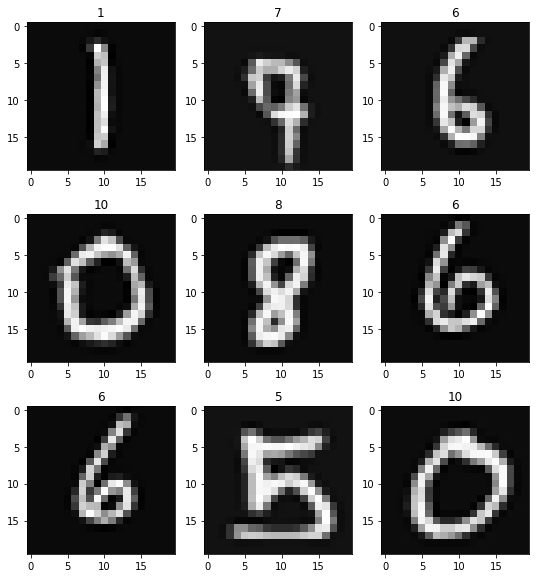

In [23]:
# X, y가 뭐로 이루어져 있는지 확인해보자. 
# 랜덤으로 그래프 그릴 데이터의 index를 5000개 중에 9개를 뽑는다. 
np.random.seed(42)
random_indices = np.random.choice(5000, 9)
# 뽑은 index를 사용해서 9개의 값만 따로 저장해준다. 
X_sample, y_sample = X[random_indices], y[random_indices]
# 3행, 3열로 그래프를 그릴 예정이다. 
rows, cols = 3, 3
# figure를 만들어준다. 
plt.figure(figsize=(9, 10))
for row in range(rows):
    for col in range(cols):
        order = row * cols + col 
        # 그래프의 행, 열에 해당하는 정보가 들어가면서 생성된다.  
        plt.subplot(rows, cols, order + 1)
        # array를 받아서 이미지로 나타내주는 그래프이다. colormap은 gray로 해주어야 흑백이 나온다. 
        plt.imshow(X_sample[order][1:].reshape([20, 20]).transpose(), cmap='gray')
        # 그래프에 맞는 y값을 매칭시켜준다. 
        plt.title(y_sample[order][0])        

### 2 Neural Networks

#### 2.1 Model representation

In [30]:
# 이미 학습되어 있는 weight 값들을 불러올 거다. 
datafile = 'data/ex3weights.mat'
# 위와 마찬가지로 scipy.io.loadmat으로 불러온다. 
mat = scipy.io.loadmat(datafile)
# 각 layer 별 theta를 theta1, theta2 로 지정해준다. 
theta1, theta2 = mat['Theta1'], mat['Theta2']
print "theta1 has shape:",theta1.shape
print "theta2 has shape:",theta2.shape

theta1 has shape: (25, 401)
theta2 has shape: (10, 26)


#### Q. theta1, theta2의 shape이 어떤 의미를 가지고 있나? 숫자가 layer에서 나타내는 각각의 의미를 쓰면 된다.
- theta1 : 401(input feature수), 25(hidden layer의 차원, in)
- theta2 : 10(classes 수), 26(hidden layer의 차원, out, bias가 더해짐.)

#### 2.2 Feedforward Propagation

In [29]:
X.shape

(5000, 401)

In [45]:
np.insert(np.dot(X, theta1.T), 0, 1, axis=1).shape

(5000, 26)

In [98]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def forwardpropagate(X,thetas):
    """
    X : input 값. (array)
    Thetas : layer 별로 필요한 theta 값들. (list)
    
    X를 받아서 layer 별로 진행한 뒤에 output을 내놓는 것이 목적이다. 
    """
    features = X
    for i in range(len(thetas)):
        theta = thetas[i]
        z = np.dot(features, theta.T)
        a = sigmoid(z)
        if i == len(thetas)-1:
            return a
        a = np.insert(a,0,1, axis=1) #Add the bias unit
        features = a

def predictNN(X,thetas):
    """
    X : input 값. (array)
    Thetas : layer 별로 필요한 theta 값들. (list)
    """
    output = forwardpropagate(X,thetas)
    pred = np.argmax(np.array(output), axis=1) + 1
    return pred

In [119]:
# "You should see that the accuracy is about 97.5%"
thetas = [theta1, theta2]
# 위에서 정의한 predictNN으로 예측해보자. 
pred = np.reshape(predictNN(X, thetas), [y.shape[0], 1])
correct = pred == y 
accuracy = np.mean(correct)

print("Training set accuracy: %0.1f%%"%(100*accuracy))
print("Accuracy 정답과의 차이 값 : {}".format(rel_error(accuracy, 0.975)))

Training set accuracy: 97.5%
Accuracy 정답과의 차이 값 : 0.000102553584248


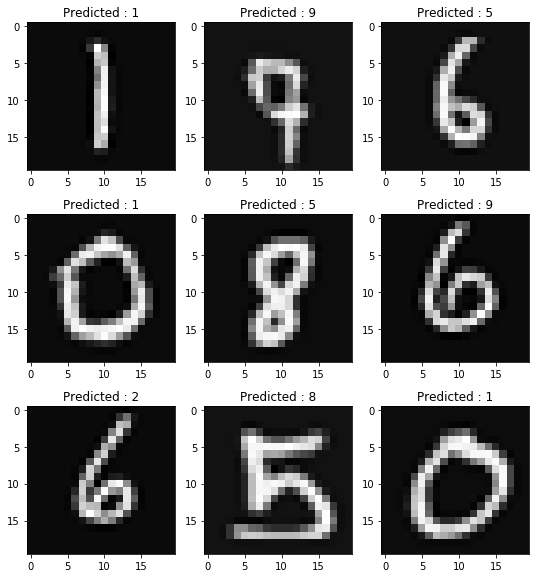

In [157]:
# 자, 이제 좋은 모델을 구한건 아니지만 weight가 학습이 되면 좋은 모델 역할을 할 수 있다는 사실을 알았다.
# 좋은 weight를 구하는 방법은 다음 시간에 보도록 하고 
# 모델로 구한 결과가 제 구실을 하는지 몇 개 sample을 뽑아서 보도록 하자. 
# 대부분 맞으니 틀린거만 보도록 하겠다. 

# 틀린 결과만 다 모은 뒤에 9개만 뽑아서 보여보자. 
incorrect_examples_indices = np.where(correct == False)[0]

# 랜덤으로 그래프 그릴 데이터의 index를 5000개 중에 9개를 뽑는다. 
np.random.seed(20)
random_indices = np.random.choice(incorrect_examples_indices, 9)
# 뽑은 index를 사용해서 9개의 값만 따로 저장해준다. 
X_incorrect_sample, y_incorrect_sample = X[random_indices], pred[random_indices]
# 3행, 3열로 그래프를 그릴 예정이다. 
rows, cols = 3, 3
# figure를 만들어준다. 
plt.figure(figsize=(9, 10))
for row in range(rows):
    for col in range(cols):
        order = row * cols + col 
        # 그래프의 행, 열에 해당하는 정보가 들어가면서 생성된다.  
        plt.subplot(rows, cols, order + 1)
        # array를 받아서 이미지로 나타내주는 그래프이다. colormap은 gray로 해주어야 흑백이 나온다. 
        plt.imshow(X_sample[order][1:].reshape([20, 20]).transpose(), cmap='gray')
        # 그래프에 맞는 y값을 매칭시켜준다. 
        plt.title("Predicted : {}".format(y_incorrect_sample[order][0]))